## 순차 데이터와 순환 신경망  
순차 데이터(Sequential data)는 텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터를 말한다.  
예를 들어, "I am a boy"는 쉽게 이해할 수 있지만 "boy am a I"는 말이 되지 않는다. 또 일별 온도를 기록한 데이터에섯  
날짜 순서를 뒤죽박죽 섞는다면 다음 날 온도를 예측하는데 아무런 도움이 되지 않는 데이터라 할 수 있다!  
앞서 공부한 내용의 MNIST 데이터 셋은 순서가 상관이 없었다. 심지어 골고루 섞는 편이 결과가 더 좋았다고 할 수 있음!  
이것은 일반적인 머신러닝 모델에서도 마찬가지라 할 수 있다!  
그러나 이번 장에서 사용하려는 댓글, 즉, 텍스트 데이터는 단어의 순서가 중요한 순차 데이터이다!  
이런 데이터는 순서를 유지하며 신경망에 주입되어야 한다. 단어의 순서를 마구 섞어서 주입하면 안된다! 그러기 위해서는  
순차 데이터를 다룰 때 이전에 입력한 데이터를 기억하는 기능이 필요하다. 예를 들면, "좋긴한데 비싸요"같은 댓글에서  
"비싸요"가 입력될 때, 앞에 "좋긴한데"를 기억하고 있어야 한다.  
기존의 Feed Forward Network나 CNN은 이런 기억 장치가 없다. 하나의 샘플을 사용하여 정방향 계산을 수행하고 나면  
그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다. 이게 앞서 말한 Feed Forward Network의 정의임!

#### 순환 신경망  
Recurrent Neural Network는 일반적인 완전 연결 신경망과 거의 비슷하다! 완전 연결 신경망에 이전 데이터의 처리 결과가  
순환되는 고리 하나만 추가하면 된다. 즉, Neuron의 출력이 다시 자기 자신으로 전달된다. 즉, 어떤 샘플을 처리할 때 이전에  
사용했던 데이터를 재사용한다고 보면 된다.  
EX)  
    C, B, A가 있고 A부터 순차적으로 RNN의 뉴런에 입력 될때 먼저 샘플 A를 처리하고 이거의 출력 $O_A$이 다시 뉴런으로  
    돌아간다. 이후에 B를 처리할 때, 앞서 출력된 $O_A$를 함께 사용한다. 이후 출력되는 $O_B$에는 A에 대한 정보가 어느 정도  
    포함되어 있다! 그다음 역시 C를 처리할 때는 앞선 과정과 똑같이 $O_B$를 C와 함꼐 입력한다!  
    이때 $O_C$에는 A와 B에 대한 정보가 담겨 있다고 할 수 있다! 이렇게 샘플을 처리하는 한 단계를 Time Step이라고 한다!!

이때 $O_C$에는 A에 대한 정보보다 B에 대한 정보가 더 많을 것이다! 즉, 순환 신경망에서 이전 time step의 샘플을 기억하지만  
time step이 오래될수록 순환되는 정보는 희미해진다. 순환 신경망에서는 특별히 층을 cell이라고 부른다! 한 cell에는 여러 개의  
뉴런이 포함되어 있지만 FC layer와 달리 뉴런을 모두 표현하지 않고 하나의 cell로 층을 표현한다. 또 cell의 출력을 은닉 상태라고  
부른다. 합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있다. 하지만 기본 구조는 같다! 입력에 어떤 가중치를  
곱하고 활성화 함수에 통과시켜 다음 층으로 내보내는 것이다! 다른 점은 층의 출력을 즉, 은닉 상태를 다음 time step에서 재사용한다는  
것이라고 보면 된다. 일반적으로 은닉층의 활성화 함수로는 $tanh$이 많이 사용된다.

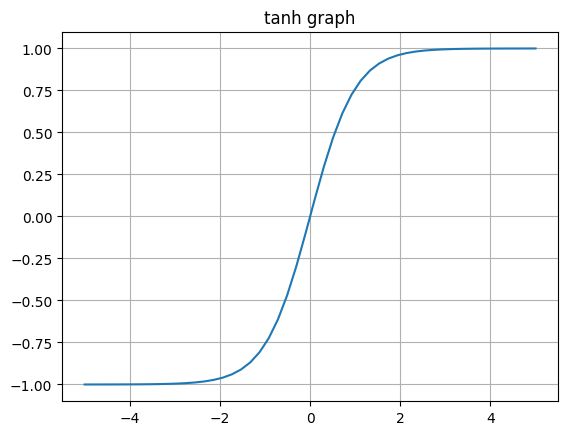

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5)
y = np.tanh(x)
plt.plot(x,y)
plt.title('tanh graph')
plt.grid()
plt.show()

위 그래프를 보면 알 수 있듯이 tanh도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. 하지만 헷갈릴 수 있기에  
그냥 책에서는 이렇게 부르지 않고 tanh라고 하며 사실 대부분 학습 시에 tanh라고 말한다!  
다른 신경망과 마찬가지로 RNN을 그림으로 도식할때, 활성화 함수를 따로 표시하지는 않는다! 다만 RNN 뉴런은 가중치가 하나 더 있다!  
바로 이전 time-step의 은닉 상태에 곱해지는 가중치이다!! 이걸 꼭 기억해라!
즉, cell의 입력은 이전 time-step의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다!

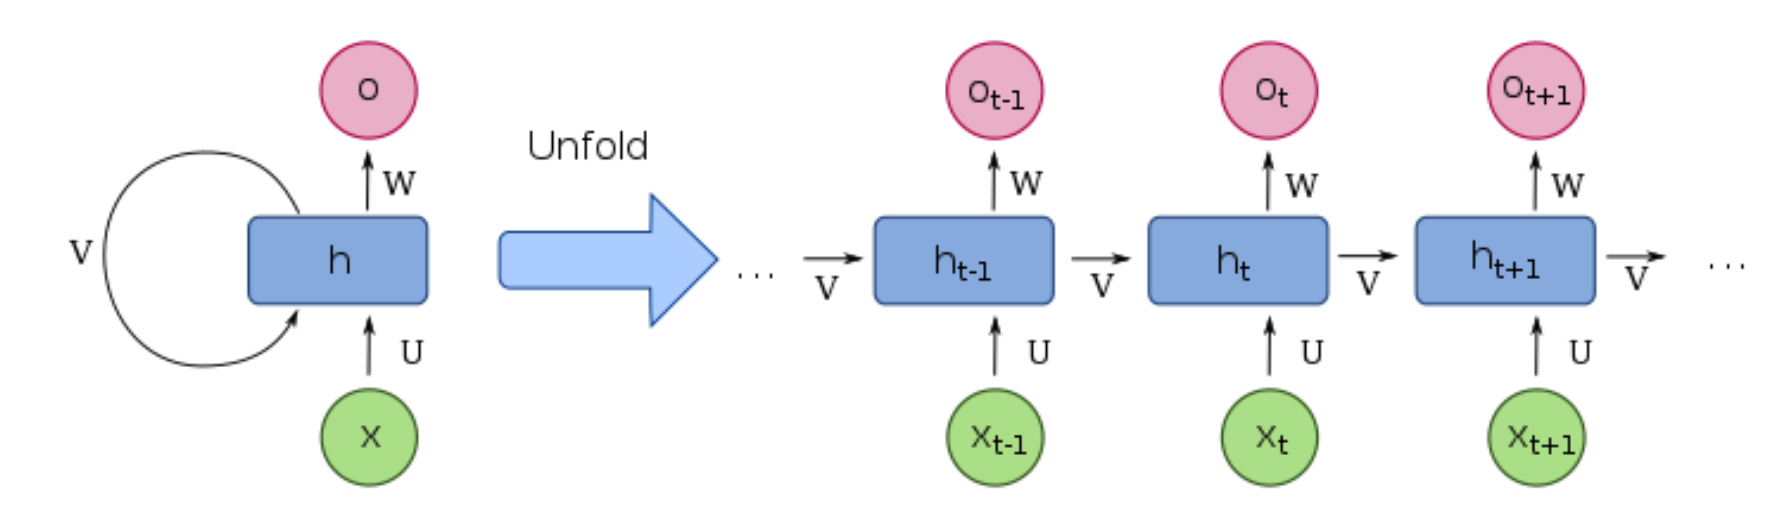